In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
titanic_df = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
print(type(titanic_df))
titanic_df

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic_df.shape

(891, 12)

In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
titanic_df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [10]:
titanic_df['Pclass'].head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [11]:
col_name1 = ['col1']
list1 = [1,2,3]
array1 = np.array(list1)
df_list1 = pd.DataFrame(list1,columns=col_name1)
df_array1 = pd.DataFrame(array1,columns=col_name1)

In [12]:
df_list1

,col1
0,1
1,2
2,3


In [13]:
df_array1

,col1
0,1
1,2
2,3


In [14]:
dic = {'col1':[1,11],'col2':[2,22],'col3':[3,33]}
df_dict = pd.DataFrame(dic)
df_dict

,col1,col2,col3
0,1,2,3
1,11,22,33


In [15]:
array3 = df_dict.values
print(array3) #ndarray
print(array3.tolist()) #list 

[[ 1  2  3]
 [11 22 33]]
[[1, 2, 3], [11, 22, 33]]


In [16]:
print(df_dict.to_dict('list'))
print(df_dict.to_dict())

{'col1': [1, 11], 'col2': [2, 22], 'col3': [3, 33]}
{'col1': {0: 1, 1: 11}, 'col2': {0: 2, 1: 22}, 'col3': {0: 3, 1: 33}}


In [17]:
titanic_df['Age_0'] = 0
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [18]:
titanic_df['Family_No'] = titanic_df['SibSp']+titanic_df['Parch']+1
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_0,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,2


In [19]:
titanic_drop_df = titanic_df.drop('Age_0',axis=1)
titanic_drop_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_No
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [20]:
titanic_df.drop(['Family_No','Age_0'],inplace=True,axis=1)

In [21]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
titanic_df.drop([0,1,2],axis=0,inplace=False).head(3).reset_index()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
1,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
2,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [23]:
titanic_df[['Name','Sex']].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [24]:
titanic_df[0:3] # index ok

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [25]:
titanic_df[titanic_df['Pclass' ] == 3 ].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [26]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
titanic_df.iloc[0,[4,7]]

Sex      male
Parch       0
Name: 0, dtype: object

In [28]:
titanic_df.loc[0,['Sex','Parch']]

Sex      male
Parch       0
Name: 0, dtype: object

In [29]:
titanic_df.iloc[titanic_df[titanic_df['Age'] >= 60][['Age','Name']].head(5).index][['Age','Name']]

,Age,Name
33,66.0,"Wheadon, Mr. Edward H"
54,65.0,"Ostby, Mr. Engelhart Cornelius"
96,71.0,"Goldschmidt, Mr. George B"
116,70.5,"Connors, Mr. Patrick"
170,61.0,"Van der hoef, Mr. Wyckoff"


In [30]:
titanic_sorted = titanic_df.sort_values(by='Name')
titanic_sorted.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.55,NaN,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.25,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.25,NaN,S
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.00,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.00,NaN,C


In [31]:
titanic_sorted = titanic_df.sort_values(by=['Survived','Name'],ascending=False) # survived first
titanic_sorted.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
559,560,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,NaN,S
325,326,1,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C32,C
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S


In [32]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [33]:
titanic_df[['Age','Fare']].mean()

Age     29.699118
Fare    32.204208
dtype: float64

In [34]:
titanic_df.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [35]:
titanic_df.groupby('Pclass')['Age'].agg(['max','min'])

,max,min
Pclass,,
1,80.0,0.92
2,70.0,0.67
3,74.0,0.42


In [36]:
agg_format = {'Age':'max','SibSp':'sum','Fare':'mean'}
titanic_df.groupby('Survived').agg(agg_format)

,Age,SibSp,Fare
Survived,,,
0,74.0,304,22.117887
1,80.0,162,48.395408


In [37]:
titanic_df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('C000')

In [40]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C000,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C000,S


In [41]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [42]:
titanic_df['Name_len'] = titanic_df['Name'].apply(lambda x : len(x))
titanic_df[['Name','Name_len']].head(3)

,Name,Name_len
0,"Braund, Mr. Owen Harris",23
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",51
2,"Heikkinen, Miss. Laina",22


In [43]:
titanic_df['Child_Adult'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else 'Adult')
titanic_df[['Age','Child_Adult']].head(9)

,Age,Child_Adult
0,22.000000,Adult
1,38.000000,Adult
2,26.000000,Adult
3,35.000000,Adult
4,35.000000,Adult
5,29.699118,Adult
6,54.000000,Adult
7,2.000000,Child
8,27.000000,Adult


In [44]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : 'Child' if x <= 15 else('Adult' if x <= 60 else 'Elderly'))

In [45]:
titanic_df['Age_cat'].value_counts()

Adult      786
Child       83
Elderly     22
Name: Age_cat, dtype: int64

In [46]:
titanic_df.groupby('Age_cat')['Survived'].mean()

Age_cat
Adult      0.366412
Child      0.590361
Elderly    0.227273
Name: Survived, dtype: float64

In [47]:
def get_category(age):
    cat = ''
    if age <= 5 : 
        cat = 'Baby'
    elif age <= 12 :
        cat = 'Child'
    elif age <= 18 :
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35 :
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat
    

In [48]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
titanic_df[['Age','Age_cat']].head(3)

,Age,Age_cat
0,22.0,Student
1,38.0,Adult
2,26.0,Young Adult


# START SURVIVOR PREDICTION

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/kaggle/input/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [109]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [110]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print(titanic_df.isnull().sum().sum())

0


In [111]:
print(titanic_df['Sex'].value_counts())
print(titanic_df['Cabin'].value_counts())
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64
N              687
C23 C25 C27      4
B96 B98          4
G6               4
E101             3
              ... 
C85              1
C106             1
E40              1
C46              1
A14              1
Name: Cabin, Length: 148, dtype: int64
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [112]:
print(titanic_df['Cabin'].str[:1])
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


In [113]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

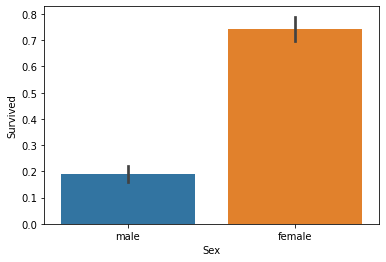

In [114]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

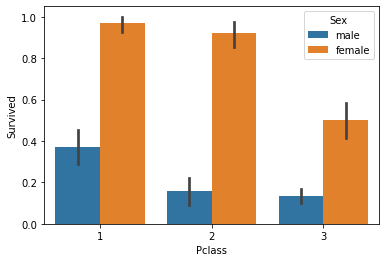

In [115]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [116]:
lst=[1,-1,7]
[get_category(x) for x in lst]

['Baby', 'Unknown', 'Child']

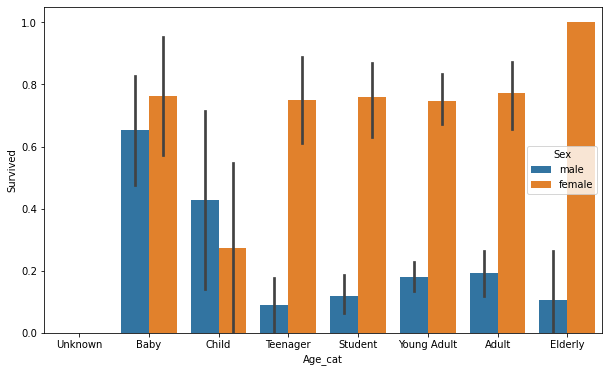

In [117]:
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5 : 
        cat = 'Baby'
    elif age <= 12 :
        cat = 'Child'
    elif age <= 18 :
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35 :
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

plt.figure(figsize=(10,6))
group_names = [get_category(x) for x in [-1,5,12,18,25,35,60,70]]
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [102]:
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF
encode_features(titanic_df)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


In [118]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [119]:
titanic_df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [120]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S


In [126]:
titanic_df = pd.get_dummies(titanic_df)

In [127]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Embarked_C,Embarked_N,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(titanic_df)
new_df = pd.DataFrame(scaler.transform(titanic_df))
new_df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
1,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,-1.835115,-0.03352,2.074505,-0.047431,-0.307562,-1.614710
2,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
3,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,-1.835115,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
4,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
887,1.266990,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.130856,4.237623,...,-0.196116,-0.193009,-0.121681,-0.067153,-1.835115,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
888,-0.789272,0.827377,0.000000,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,0.544925,-0.03352,-0.482043,-0.047431,-0.307562,0.619306
889,1.266990,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,-0.130856,-0.235981,...,-0.196116,-0.193009,-0.121681,-0.067153,-1.835115,-0.03352,2.074505,-0.047431,-0.307562,-1.614710


In [146]:
from sklearn.model_selection import train_test_split


new_y_titanic_df = new_df[0].astype(int)
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived',axis=1)
new_x_titanic_df = new_df.drop(0,axis=1)

x_train,x_test,y_train,y_test = train_test_split(x_titanic_df,y_titanic_df,test_size=0.1,random_state=778)
new_x_train,new_x_test,new_y_train,new_y_test = train_test_split(new_x_titanic_df,new_y_titanic_df,test_size=0.1,random_state=778)

In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=778)
rf_clf = RandomForestClassifier(random_state=778)
lr_clf = LogisticRegression()

dt_clf.fit(x_train,y_train)
dt_pred = dt_clf.predict(x_test)
print('Decision Tree Classifier Acc: {:.4f} %'.format(accuracy_score(y_test,dt_pred)*100))
rf_clf.fit(x_train,y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForest Classifier Acc: {:.4f} %'.format(accuracy_score(y_test,rf_pred)*100))
lr_clf.fit(x_train,y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression Acc: {:.4f} %'.format(accuracy_score(y_test,lr_pred)*100))
print('====='*30)
dt_clf.fit(new_x_train,new_y_train)
dt_pred = dt_clf.predict(new_x_test)
print('Decision Tree Classifier Acc: {:.4f} %'.format(accuracy_score(new_y_test,dt_pred)*100))
rf_clf.fit(new_x_train,new_y_train)
rf_pred = rf_clf.predict(new_x_test)
print('RandomForest Classifier Acc: {:.4f} %'.format(accuracy_score(new_y_test,rf_pred)*100))
lr_clf.fit(new_x_train,new_y_train)
lr_pred = lr_clf.predict(new_x_test)
print('LogisticRegression Acc: {:.4f} %'.format(accuracy_score(new_y_test,lr_pred)*100))

Decision Tree Classifier Acc: 72.2222 %
RandomForest Classifier Acc: 74.4444 %
LogisticRegression Acc: 75.5556 %
Decision Tree Classifier Acc: 72.2222 %


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForest Classifier Acc: 75.5556 %
LogisticRegression Acc: 75.5556 %


In [148]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_clf,x_titanic_df,y_titanic_df,cv=5)
print(scores)
print(scores.mean())

[0.79329609 0.79775281 0.83707865 0.76966292 0.85393258]
0.810344611135522


In [151]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[5,10,15],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}
grid_rf = GridSearchCV(rf_clf,param_grid = params,scoring='accuracy',cv=5)
grid_rf.fit(x_train,y_train)
print(grid_rf.best_params_)
print(grid_rf.best_score_)
best_rf = grid_rf.best_estimator_
pred = best_rf.predict(x_test)
print(accuracy_score(y_test,pred))

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8414673913043478


NameError: name 'bset_rf' is not defined